In [2]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler

Exploratory Data Analysis (EDA)   

In [3]:
data = pd.read_csv('Mall_Customers.csv')
print(data.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


Understand the data

In [4]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


In [5]:
print(data.isnull().sum())

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


There are no missing values in the dataset.So, no need for handling missing values.

In [6]:
print(data.describe())

       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000


Describe the data:   
Mean age of customers is 38.85 years, with a standard deviation of 13.97 years.That means most customers are between 25 and 52 years old.  
25% of customers are aged 29 or younger, while 75% are aged 49 or younger.    
Maximum age of customers is 70 years.  
Similarly, the statistics for other features can be interpreted.


In [7]:
#Look for duplicates
print("Number of Duplicated data",data.duplicated().sum())

Number of Duplicated data 0


In [8]:
#Remove customerID column as it is not useful for clustering
data = data.drop('CustomerID', axis=1)

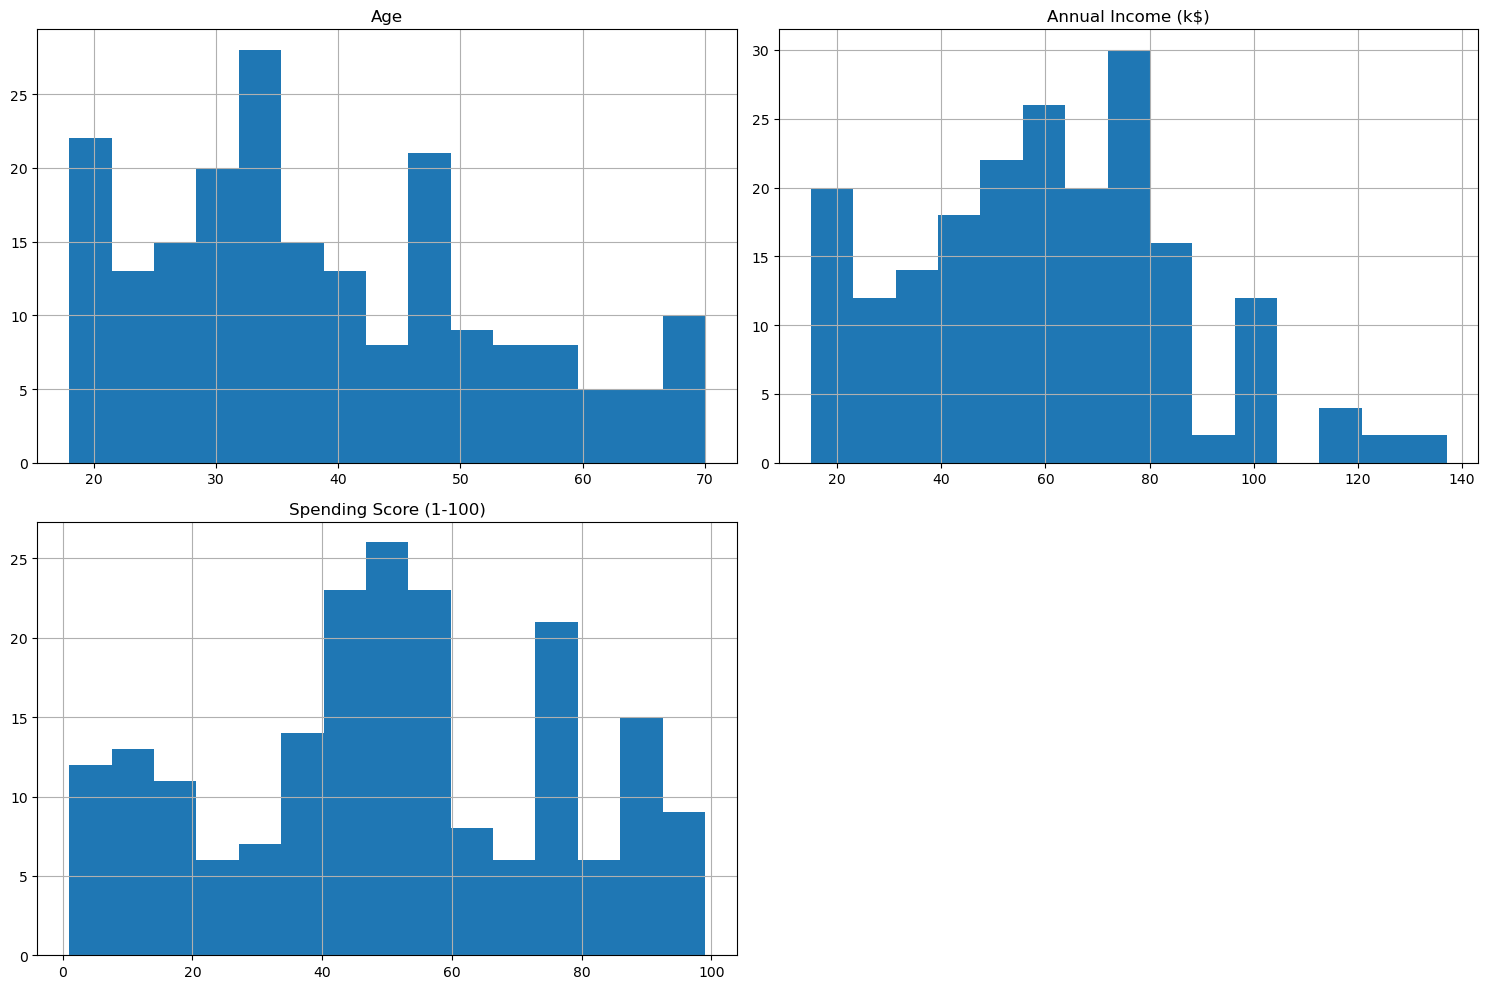

In [9]:
#Plot histograms for numerical features
data.hist(bins=15, figsize=(15, 10))
plt.tight_layout()
plt.show()


In [10]:
print(data['Gender'].value_counts())

Gender
Female    112
Male       88
Name: count, dtype: int64


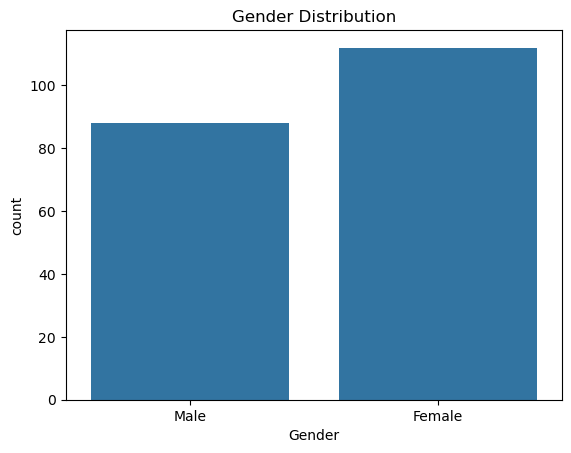

In [11]:
#plot graph for gender distribution
sns.countplot(x='Gender', data=data)
plt.title('Gender Distribution')
plt.show()  

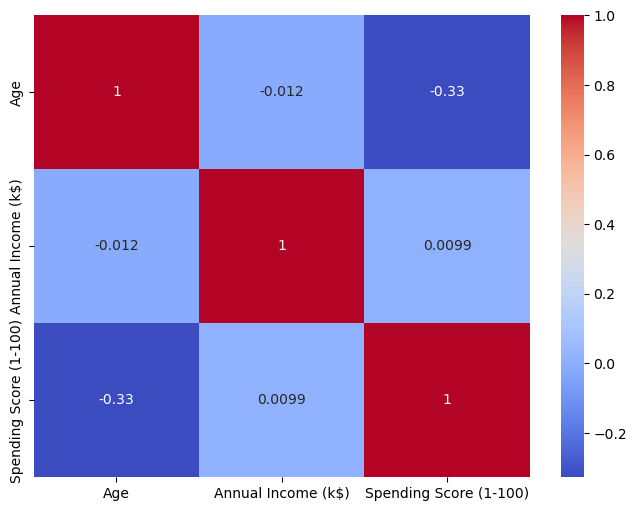

In [12]:
#correlation heatmap
data_1 = data.drop('Gender', axis=1)  # Drop non-numeric column for correlation
plt.figure(figsize=(8, 6))  
sns.heatmap(data_1.corr(), annot=True, cmap='coolwarm')
plt.show()

In [13]:
print(data[['Age','Annual Income (k$)','Spending Score (1-100)']].corr(method='pearson'))
print(data[['Age','Annual Income (k$)','Spending Score (1-100)']].corr(method='spearman'))


                             Age  Annual Income (k$)  Spending Score (1-100)
Age                     1.000000           -0.012398               -0.327227
Annual Income (k$)     -0.012398            1.000000                0.009903
Spending Score (1-100) -0.327227            0.009903                1.000000
                             Age  Annual Income (k$)  Spending Score (1-100)
Age                     1.000000            0.019767                -0.34494
Annual Income (k$)      0.019767            1.000000                 0.00784
Spending Score (1-100) -0.344940            0.007840                 1.00000


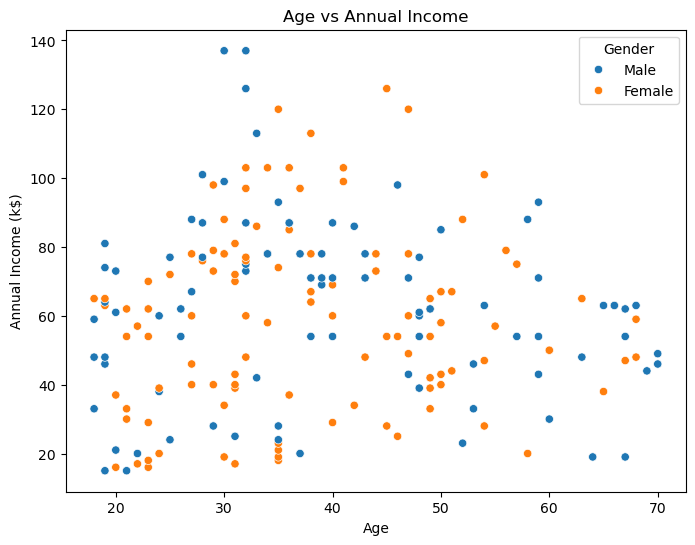

In [14]:
#Plot scatter plots for Age vs Annual Income
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Annual Income (k$)', hue='Gender', data=data)
plt.title('Age vs Annual Income')
plt.show()

The plot shows that 30-40 years age group has highest annual income. However, If we see the correlation heatmap, the relationship between these two features is very weak (-0.012), which means with increse in age, annual income decreases slightly.

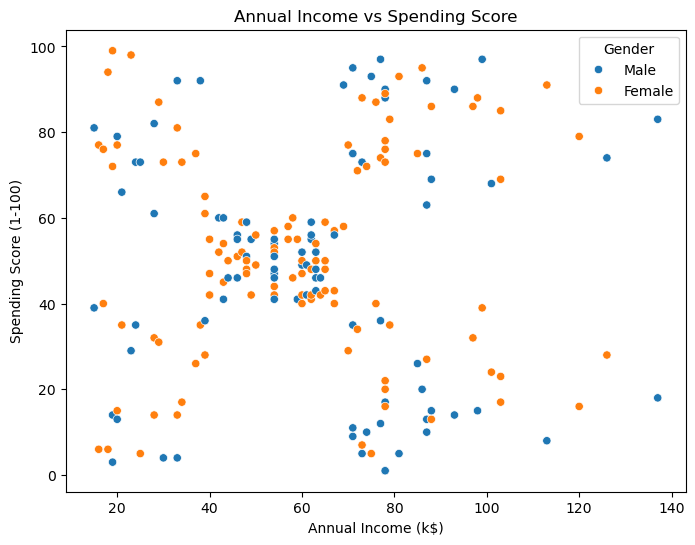

In [15]:
#plot scatter plot for annual income and spending score   
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Gender', data=data)
plt.title('Annual Income vs Spending Score')      
plt.show()

The correlation heatmap shows that correlation between Annual Income and Spending Score is very weak (0.009), which shows there is no clear relationship between these two features.
But if we see the scatter plot, we can see that customers with moderate annual income (40-70k$) have moderate spending score (40-60).

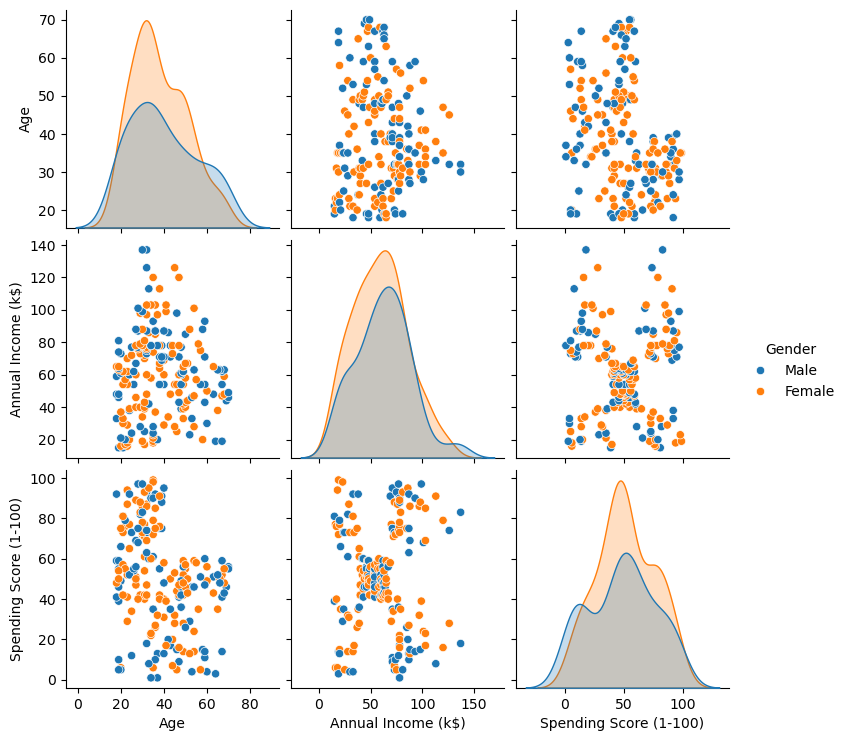

In [16]:
#plot pairplot to see relationships between features
sns.pairplot(data, hue='Gender')
plt.show()  

In [17]:
#Standardize the data
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]
scaler = StandardScaler()   
X_scaled = scaler.fit_transform(X) 

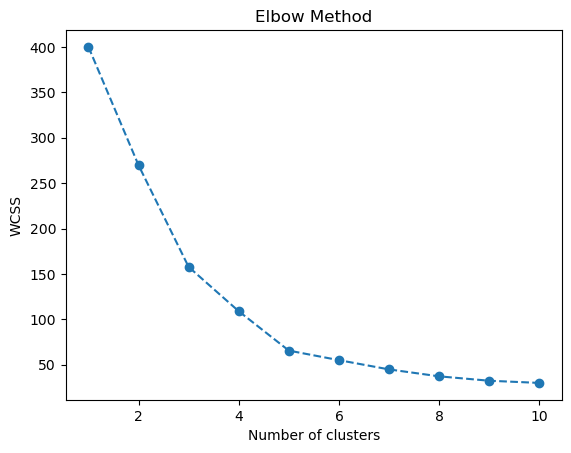

In [18]:
#Finding optimal number of clusters using Elbow method
#ignore warnings
import warnings
warnings.filterwarnings('ignore')
 
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,init='k-means++',n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)    
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

The optimal number of clusters appears to be k=5 because:  
There's a clear elbow around 5 clusters  
WCSS drops steeply from 1→5 clusters  
After 5, the decrease is more gradual and less significant. So,choosing clusters above 5 is meaningless.

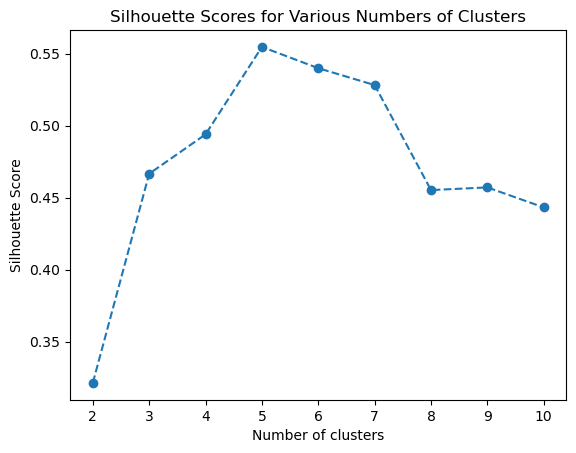

In [19]:
#Check quality of clustering for all number of clusters(1-10) using silhouette score
from sklearn.metrics import silhouette_score
silhouette_scores = []
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', n_init=10, random_state=42)
    cluster_labels = kmeans.fit_predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--')
plt.title('Silhouette Scores for Various Numbers of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()



For n_clusters = 5 The average silhouette_score is : 0.5546571631111091


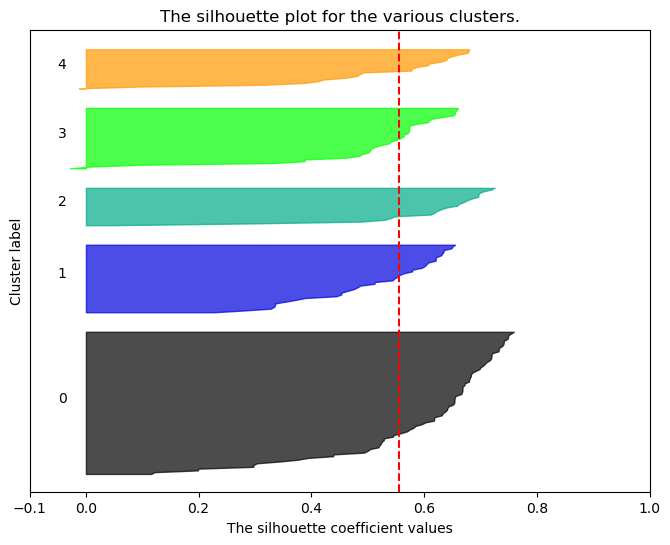

In [20]:
#silhouette diagram for 5 clusters
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
n_clusters = 5
fig, ax1 = plt.subplots(1, 1)
fig.set_size_inches(8, 6)
ax1.set_xlim([-0.1, 1])
# The (n_clusters+1)*10 is for inserting blank space between silhouette
# plots of individual clusters, to demarcate them clearly.
ax1.set_ylim([0, len(X_scaled) + (n_clusters + 1) * 10])

# Initialize the clusterer with n_clusters value and a random generator
# seed of 10 for reproducibility.
clusterer = KMeans(n_clusters=n_clusters, init='k-means++', n_init=10, random_state=42)
cluster_labels = clusterer.fit_predict(X_scaled)
# The silhouette_score gives the average value for all the samples.
# This gives a perspective into the density and separation of the formed
# clusters
silhouette_avg = silhouette_score(X_scaled, cluster_labels)
print("For n_clusters =", n_clusters,
        "The average silhouette_score is :", silhouette_avg)
# Compute the silhouette scores for each sample
sample_silhouette_values = silhouette_samples(X_scaled, cluster_labels)
y_lower = 10
for i in range(n_clusters):
    # Aggregate the silhouette scores for samples belonging to
    # cluster i, and sort them
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    color = cm.nipy_spectral(float(i) / n_clusters)
    ax1.fill_betweenx(np.arange(y_lower, y_upper),  0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)
    # Label the silhouette plots with their cluster numbers at the middle
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples
ax1.set_title("The silhouette plot for the various clusters.")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")
# The vertical line for average silhouette score of all the values
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
ax1.set_yticks([])  # Clear the yaxis labels / ticks
ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
plt.show()

In [21]:
#Apply KMeans with optimal clusters with centroid initialization

optimal_clusters = 5  
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', n_init=10, random_state=42)
data['Cluster'] = kmeans.fit_predict(X_scaled)  
print(data['Cluster'].value_counts())

Cluster
0    81
1    39
3    35
4    23
2    22
Name: count, dtype: int64


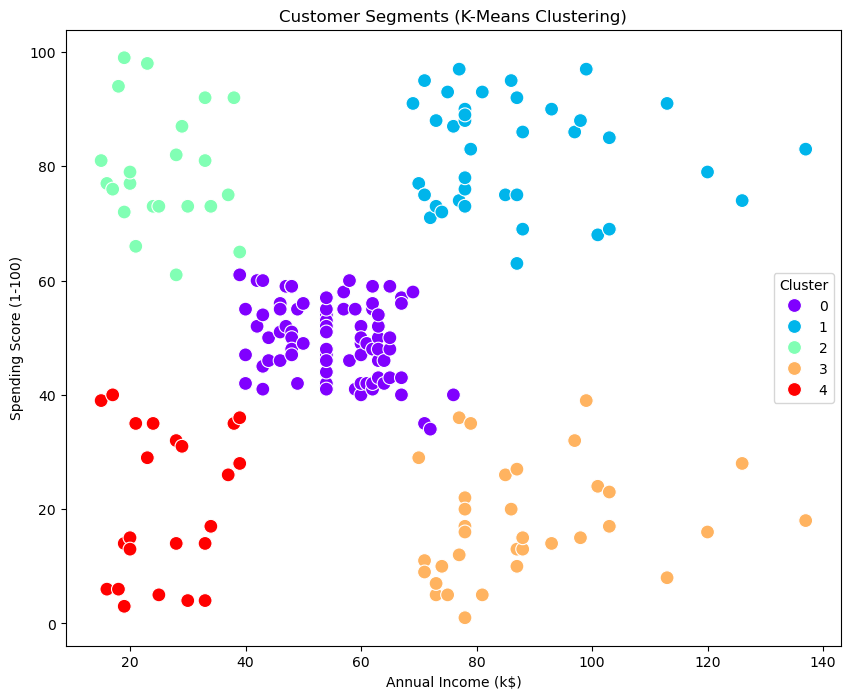

In [22]:
#Visualize clusters
plt.figure(figsize=(10, 8)) 
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='rainbow', data=data, s=100)
plt.title('Customer Segments (K-Means Clustering)')
plt.show()

Cluster color indication:  
Cluster 0 (Purple): Average income, average spending score  
Cluster 1 (Blue): High income, high spending score    
Cluster 2 (Green): Low income, high spending score 
Cluster 3 (Orange): High income, low spending score  
Cluster 4 (Red): Low income, low spending score


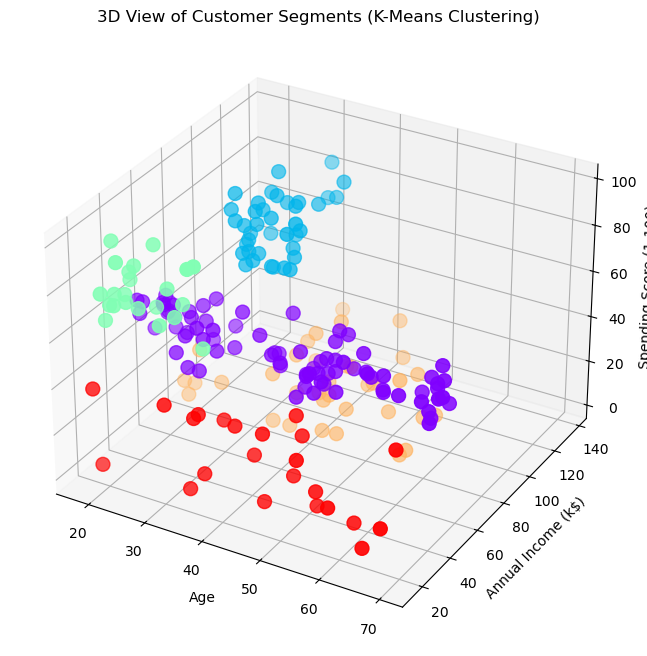

In [77]:
#visualize 3d clusters for age, annual income and spending score
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(data['Age'], data['Annual Income (k$)'], data['Spending Score (1-100)'], c=data['Cluster'], cmap='rainbow', s=100)
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
plt.title('3D View of Customer Segments (K-Means Clustering)')
plt.show()

DBSCAN(DENSity-Based Spatial Clustering of Applications with Noise)

In [74]:
#DBSCAN clustering
#tuning eps and min_samples
dbscan = DBSCAN(eps=0.3, min_samples=4)  # Adjust eps and min_samples as needed
data['DBSCAN_Cluster'] = dbscan.fit_predict(X_scaled)
print(data['DBSCAN_Cluster'].value_counts())

DBSCAN_Cluster
 3    88
 4    32
-1    23
 0    16
 5    14
 6     9
 1     8
 2     7
 7     3
Name: count, dtype: int64


In [75]:
#calculate silhouette score for DBSCAN clusters
# Ignore noise points labeled as -1
from sklearn.metrics import silhouette_score
mask = data['DBSCAN_Cluster'] != -1
if len(data['DBSCAN_Cluster'][mask].unique()) > 1:  # Ensure there are at least 2 clusters
    silhouette_avg_dbscan = silhouette_score(X_scaled[mask], data['DBSCAN_Cluster'][mask])
    print("Silhouette Score for DBSCAN clusters (excluding noise):", silhouette_avg_dbscan)


Silhouette Score for DBSCAN clusters (excluding noise): 0.5197459953499523


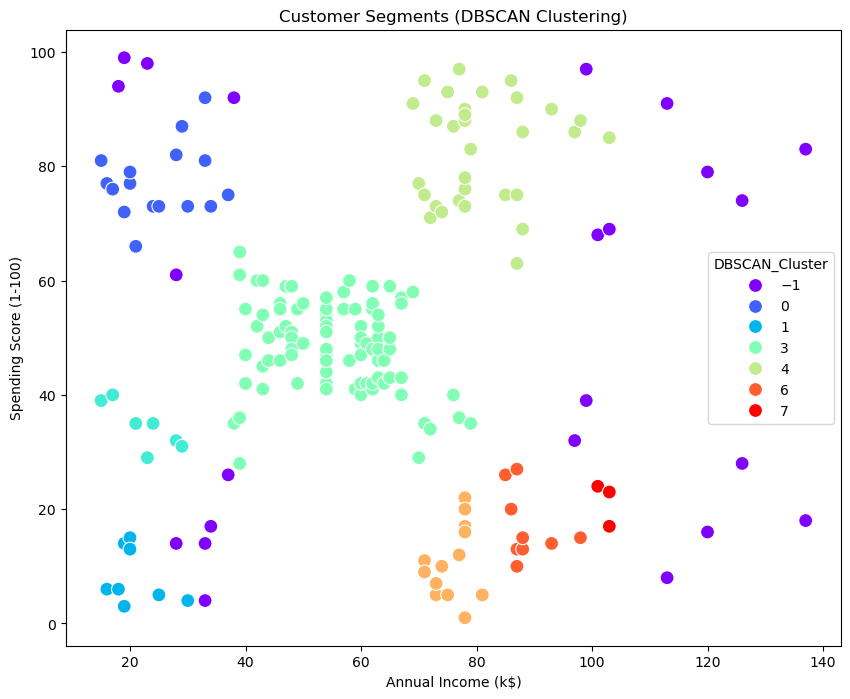

In [76]:
#DBSCAN clustering plot 
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='DBSCAN_Cluster', palette='rainbow', data=data, s=100)
plt.title('Customer Segments (DBSCAN Clustering)')
plt.show()

